# Summary of fit and evaluate experiments for type 1 graph neural networks 

In [8]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import tensorflow as tf

import matplotlib.pyplot as plt

import graph_utils as graph_utils
import graph_neural_networks as graph_nn
import data_preparation_utils as data_prep
from iterative_updaters import VanillaGradientDescent, MomentumGradientDescent, NesterovMomentumGradientDescent, RMSPropGradientDescent, AdamGradientDescent
import training_and_evaluation as train_eval
import graph_nn_experiments as experiments

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
experiments_directory = "100k_fit_and_evaluate_experiments"

def gradient_descent_set_file_name(no_of_layers, no_of_channels, activation):
    return "%s/simulation_Xy_%d_%d_%s.csv" % (experiments_directory, no_of_layers, no_of_channels, activation)

gradient_descent_set_file_name(10, 11, "relu")

'100k_fit_and_evaluate_experiments/simulation_Xy_10_11_relu.csv'

Seems to work fine. Unfortunately, we haven't saved these file names to fit_eval_results.csv

In [10]:
ochota_adj_matrix = np.genfromtxt("macierz_sasiedztwa.txt")

We need this adjacency matrix.

In [11]:
df = pd.read_csv("100k_fit_and_evaluate_experiments/fit_eval_results.csv", header=None)
df.sort_values([5])

,0,1,2,3,4,5
61,3,6,tanh,100k_fit_and_evaluate_experiments/model_3_6_ta...,0.015654,0.016347
26,4,6,tanh,100k_fit_and_evaluate_experiments/model_4_6_ta...,0.013958,0.016786
63,2,5,tanh,100k_fit_and_evaluate_experiments/model_2_5_ta...,0.016845,0.017154
27,6,6,tanh,100k_fit_and_evaluate_experiments/model_6_6_ta...,0.013177,0.017183
6,6,4,tanh,100k_fit_and_evaluate_experiments/model_6_4_ta...,0.015155,0.017238
54,5,3,tanh,100k_fit_and_evaluate_experiments/model_5_3_ta...,0.017120,0.017969
7,3,4,tanh,100k_fit_and_evaluate_experiments/model_3_4_ta...,0.016459,0.017978
36,5,5,tanh,100k_fit_and_evaluate_experiments/model_5_5_ta...,0.014324,0.018343
68,5,6,tanh,100k_fit_and_evaluate_experiments/model_5_6_ta...,0.013963,0.018536
59,6,3,tanh,100k_fit_and_evaluate_experiments/model_6_3_ta...,0.015926,0.018740


We need the original training data for scaling and maximum error calculation:

In [12]:
traffic_lights_data = pd.read_csv("100k.csv", header=None)
traffic_lights_data.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,81,14,58,108,83,60,82,61,64,94,...,28,87,73,69,25,7,77,95,5,49082
1,81,92,16,44,95,64,110,98,95,105,...,42,5,40,105,118,48,40,62,45,51223
2,75,20,66,104,20,65,80,97,2,81,...,119,115,118,64,68,46,45,43,18,51461
3,30,42,65,108,67,81,85,32,83,48,...,107,79,44,90,6,25,46,102,62,45119
4,117,20,52,40,25,36,87,78,99,70,...,92,21,34,102,37,46,11,9,66,50660


In [13]:
X, y, X_scaler, y_scaler = data_prep.scale_standard_traffic_light_data(traffic_lights_data)

C:\Users\Lukasz\AppData\Local\conda\conda\envs\aind\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [7]:
np.mean(traffic_lights_data[21])

48922.72721576669

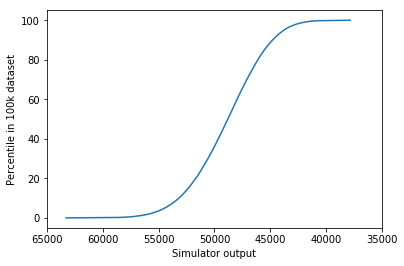

In [157]:
ps = [i / 4.0 for i in range(401)]
percentiles=-np.percentile(-traffic_lights_data[21], ps)
plt.xlim(65000.0,35000.0)
plt.xlabel("Simulator output")
plt.ylabel("Percentile in 100k dataset")
plt.plot(percentiles, ps)

Train test split:

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=831191)

This code not really used, just kept in case:

In [46]:
tf.reset_default_graph()

no_of_layers = 3
no_of_channels = 6
activation_name = "tanh"
activation = tf.nn.tanh
model_checkpoint_file = "100k_fit_and_evaluate_experiments/model_3_6_tanh.ckpt"


nn_input = tf.placeholder(dtype=tf.float32, shape=[None, 21])
targets = tf.placeholder(dtype=tf.float32, shape=[None, 1])
print("Constructing network with %d layers, %d channels per layer and %s activation function" % (no_of_layers, no_of_channels, activation_name))
nn_output = graph_nn.transfer_matrix_neural_net(nn_input, no_of_layers, no_of_channels, activation, ochota_adj_matrix, verbose=True, share_weights_in_transfer_matrix=False, share_biases_in_transfer_matrix=False)
print("Restoring gradient descent test set")
#X, y = load_gradient_descent_data(no_of_layers, no_of_channels, activation_name)
print("Scaling")
#X_test, y_test = scale_data(X, y, X_scaler, y_scaler)
print("Restoring network weights from %s and evaluating on test set" % model_checkpoint_file)
model_avg_error, actual_vs_predicted = train_eval.evaluate_model_on_a_dataset(model_checkpoint_file, nn_output,nn_input, X_test, y_test, y_scaler)
print("Model avg. error on test set: %f" % model_avg_error)
# close session (if open)
try:
    sess.close()
except:
    pass
# open new session
sess =  tf.Session()
saver = tf.train.Saver()
saver.restore(sess, model_checkpoint_file)



Constructing network with 3 layers, 6 channels per layer and tanh activation function
(21, 48, 1, 6)
(?, 48, 6)
(48, 21, 6, 6)
(?, 21, 6)
(21, 48, 6, 6)
(?, 48, 6)
(?, 288)
Restoring gradient descent test set
Scaling
Restoring network weights from 100k_fit_and_evaluate_experiments/model_3_6_tanh.ckpt and evaluating on test set
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_3_6_tanh.ckpt
Model avg. error on test set: 0.016347
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_3_6_tanh.ckpt


In [19]:
for row in df.head(1).iterrows():
    print(row[1])

0                                                    1
1                                                    1
2                                                 relu
3    100k_fit_and_evaluate_experiments/model_1_1_re...
4                                             0.049325
5                                             0.068004
Name: 0, dtype: object


Core code to be used in this notebook:

In [26]:
def load_gradient_descent_data(no_of_layers, no_of_channels, activation_name):
    data_file_name = gradient_descent_set_file_name(no_of_layers, no_of_channels, activation_name)
    data = pd.read_csv(data_file_name, header=None)
    no_of_columns = data.shape[1]
    X = data.iloc[:,0:(no_of_columns-1)]
    y = data.iloc[:,no_of_columns-1].values.reshape(-1,1)
    
    data_normalized = data.copy()
    data_normalized.iloc[:,0:(no_of_columns-1)] = X_scaler.transform(data_normalized.iloc[:,0:(no_of_columns-1)])
    data_normalized.iloc[:,no_of_columns-1] = y_scaler.transform(data_normalized.iloc[:,no_of_columns-1].values.reshape(-1,1))
    X_scaled = data_normalized.iloc[:,0:(no_of_columns-1)]
    y_scaled = data_normalized.iloc[:,no_of_columns-1]
    
    return X, y, X_scaled, y_scaled

def scale_data(X_input, y_input, X_scaler, y_scaler):
    X_input_ = X_input.copy()
    y_input_ = y_input.copy()
    X_scaled = X_scaler.transform(X_input_)
    y_scaled = y_scaler.transform(y_input_)
    return X_scaled, y_scaled
    
    
def find_lowest_avg_waiting_time(no_of_layers, no_of_channels, activation_name):
    X, y, X_scaled, y_scaled = load_gradient_descent_data(no_of_layers, no_of_channels, activation_name)
    return min(y)[0]

def assess_avg_error_below_some_target_values(target_values, 
                                              no_of_layers,
                                              no_of_channels, 
                                              activation_name,
                                              model_file_name,
                                              X_scaler, 
                                              y_scaler):
    
    g_X, g_y, scaled_g_X, scaled_g_y = load_gradient_descent_data(no_of_layers, no_of_channels, activation_name)
    #scaled_g_X, scaled_g_y = scale_data(g_X, g_y, X_scaler, y_scaler)
    
    if activation_name == "relu":
        activation = tf.nn.relu
    else:
        activation = tf.nn.tanh
        
    tf.reset_default_graph()
    nn_input = tf.placeholder(dtype=tf.float32, shape=[None, 21])
    targets = tf.placeholder(dtype=tf.float32, shape=[None, 1])
    print("Constructing network with %d layers, %d channels per layer and %s activation function" % (no_of_layers, no_of_channels, activation_name))
    nn_output = graph_nn.transfer_matrix_neural_net(nn_input, no_of_layers, no_of_channels, activation, ochota_adj_matrix, verbose=True, share_weights_in_transfer_matrix=False, share_biases_in_transfer_matrix=False)
    
    avg_errors = []
    
    for target_value in target_values:
        
        selected_indices = np.argwhere(g_y.reshape(-1) < target_value).reshape(-1)
        
        if len(selected_indices) > 0:
            X_test = scaled_g_X.iloc[selected_indices,:]
            y_test = scaled_g_y[selected_indices]
            model_avg_error, actual_vs_predicted = train_eval.evaluate_model_on_a_dataset(model_file_name, nn_output, nn_input, X_test, y_test, y_scaler)
        else:
            model_avg_error = np.nan
            
        avg_errors.append(model_avg_error)
        
    return avg_errors

def find_maximum_relative_error(no_of_layers, no_of_channels, activation_name, model_file_name, X_scaler, y_scaler):
    
    if activation_name == "relu":
        activation = tf.nn.relu
    else:
        activation = tf.nn.tanh
        
    tf.reset_default_graph()
    nn_input = tf.placeholder(dtype=tf.float32, shape=[None, 21])
    targets = tf.placeholder(dtype=tf.float32, shape=[None, 1])
    print("Constructing network with %d layers, %d channels per layer and %s activation function" % (no_of_layers, no_of_channels, activation_name))
    nn_output = graph_nn.transfer_matrix_neural_net(nn_input, no_of_layers, no_of_channels, activation, ochota_adj_matrix, verbose=True, share_weights_in_transfer_matrix=False, share_biases_in_transfer_matrix=False)
    
    model_max_error = train_eval.find_model_maximum_relative_error_on_a_dataset(model_file_name, nn_output, nn_input, X_test, y_test, y_scaler)
    
    return model_max_error

def assess_error_stdev_below_some_target_values(target_values, 
                                                no_of_layers,
                                                no_of_channels, 
                                                activation_name,
                                                model_file_name,
                                                X_scaler, 
                                                y_scaler):
    
    g_X, g_y, scaled_g_X, scaled_g_y = load_gradient_descent_data(no_of_layers, no_of_channels, activation_name)
    #scaled_g_X, scaled_g_y = scale_data(g_X, g_y, X_scaler, y_scaler)
    
    if activation_name == "relu":
        activation = tf.nn.relu
    else:
        activation = tf.nn.tanh
        
    tf.reset_default_graph()
    nn_input = tf.placeholder(dtype=tf.float32, shape=[None, 21])
    targets = tf.placeholder(dtype=tf.float32, shape=[None, 1])
    print("Constructing network with %d layers, %d channels per layer and %s activation function" % (no_of_layers, no_of_channels, activation_name))
    nn_output = graph_nn.transfer_matrix_neural_net(nn_input, no_of_layers, no_of_channels, activation, ochota_adj_matrix, verbose=True, share_weights_in_transfer_matrix=False, share_biases_in_transfer_matrix=False)
    
    error_stdevs = []
    
    for target_value in target_values:
        
        selected_indices = np.argwhere(g_y.reshape(-1) < target_value).reshape(-1)
        
        if len(selected_indices) > 0:
            X_test = scaled_g_X.iloc[selected_indices,:]
            y_test = scaled_g_y[selected_indices]
            model_error_stdev = train_eval.find_model_relative_error_stdev_on_a_dataset(model_file_name, nn_output, nn_input, X_test, y_test, y_scaler)
        else:
            model_error_stdev = np.nan
            
        error_stdevs.append(model_error_stdev)
        
    return error_stdevs

Add min waiting times (from actual simulation) to the data frame:

In [27]:
min_waiting_times = []

for row in df.iterrows():
    no_of_layers = row[1][0]
    no_of_channels = row[1][1]
    activation_name = row[1][2]
    min_waiting_time = find_lowest_avg_waiting_time(no_of_layers, no_of_channels, activation_name)
    min_waiting_times.append(min_waiting_time)

df_plus_min_waiting_time = df.copy() 
df_plus_min_waiting_time[len(df_plus_min_waiting_time.columns)] = pd.Series(min_waiting_times, df_plus_min_waiting_time.index)

In [14]:
df_plus_min_waiting_time.sort_values([5])

,0,1,2,3,4,5,6
61,3,6,tanh,100k_fit_and_evaluate_experiments/model_3_6_ta...,0.015654,0.016347,32360.0
26,4,6,tanh,100k_fit_and_evaluate_experiments/model_4_6_ta...,0.013958,0.016786,32332.0
63,2,5,tanh,100k_fit_and_evaluate_experiments/model_2_5_ta...,0.016845,0.017154,32659.0
27,6,6,tanh,100k_fit_and_evaluate_experiments/model_6_6_ta...,0.013177,0.017183,32298.0
6,6,4,tanh,100k_fit_and_evaluate_experiments/model_6_4_ta...,0.015155,0.017238,33032.0
54,5,3,tanh,100k_fit_and_evaluate_experiments/model_5_3_ta...,0.017120,0.017969,31957.0
7,3,4,tanh,100k_fit_and_evaluate_experiments/model_3_4_ta...,0.016459,0.017978,31909.0
36,5,5,tanh,100k_fit_and_evaluate_experiments/model_5_5_ta...,0.014324,0.018343,32105.0
68,5,6,tanh,100k_fit_and_evaluate_experiments/model_5_6_ta...,0.013963,0.018536,32120.0
59,6,3,tanh,100k_fit_and_evaluate_experiments/model_6_3_ta...,0.015926,0.018740,32531.0


Also calculate max errors on test set:

In [37]:
max_errors = []

for row in df.iterrows():
    no_of_layers = row[1][0]
    no_of_channels = row[1][1]
    activation_name = row[1][2]
    model_file = row[1][3]
    max_error = find_maximum_relative_error(no_of_layers, no_of_channels, activation_name, model_file, X_scaler, y_scaler)
    max_errors.append(max_error)

df_plus_max_errors = df_plus_min_waiting_time.copy() 
df_plus_max_errors[len(df_plus_max_errors.columns)] = pd.Series(max_errors, df_plus_max_errors.index)

Constructing network with 1 layers, 1 channels per layer and relu activation function
(21, 48, 1, 1)
(?, 48, 1)
(?, 48)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_1_1_relu.ckpt
Constructing network with 5 layers, 1 channels per layer and relu activation function
(21, 48, 1, 1)
(?, 48, 1)
(48, 21, 1, 1)
(?, 21, 1)
(21, 48, 1, 1)
(?, 48, 1)
(48, 21, 1, 1)
(?, 21, 1)
(21, 48, 1, 1)
(?, 48, 1)
(?, 48)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_5_1_relu.ckpt
Constructing network with 6 layers, 2 channels per layer and tanh activation function
(21, 48, 1, 2)
(?, 48, 2)
(48, 21, 2, 2)
(?, 21, 2)
(21, 48, 2, 2)
(?, 48, 2)
(48, 21, 2, 2)
(?, 21, 2)
(21, 48, 2, 2)
(?, 48, 2)
(48, 21, 2, 2)
(?, 21, 2)
(?, 42)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_6_2_tanh.ckpt
Constructing network with 2 layers, 6 channels per layer and tanh activation function
(21, 48, 1, 6)
(?, 48, 6)
(48, 2

(?, 48, 6)
(?, 288)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_1_6_tanh.ckpt
Constructing network with 6 layers, 1 channels per layer and tanh activation function
(21, 48, 1, 1)
(?, 48, 1)
(48, 21, 1, 1)
(?, 21, 1)
(21, 48, 1, 1)
(?, 48, 1)
(48, 21, 1, 1)
(?, 21, 1)
(21, 48, 1, 1)
(?, 48, 1)
(48, 21, 1, 1)
(?, 21, 1)
(?, 21)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_6_1_tanh.ckpt
Constructing network with 3 layers, 6 channels per layer and relu activation function
(21, 48, 1, 6)
(?, 48, 6)
(48, 21, 6, 6)
(?, 21, 6)
(21, 48, 6, 6)
(?, 48, 6)
(?, 288)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_3_6_relu.ckpt
Constructing network with 4 layers, 2 channels per layer and relu activation function
(21, 48, 1, 2)
(?, 48, 2)
(48, 21, 2, 2)
(?, 21, 2)
(21, 48, 2, 2)
(?, 48, 2)
(48, 21, 2, 2)
(?, 21, 2)
(?, 42)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experim

Constructing network with 6 layers, 3 channels per layer and tanh activation function
(21, 48, 1, 3)
(?, 48, 3)
(48, 21, 3, 3)
(?, 21, 3)
(21, 48, 3, 3)
(?, 48, 3)
(48, 21, 3, 3)
(?, 21, 3)
(21, 48, 3, 3)
(?, 48, 3)
(48, 21, 3, 3)
(?, 21, 3)
(?, 63)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_6_3_tanh.ckpt
Constructing network with 2 layers, 4 channels per layer and relu activation function
(21, 48, 1, 4)
(?, 48, 4)
(48, 21, 4, 4)
(?, 21, 4)
(?, 84)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_2_4_relu.ckpt
Constructing network with 3 layers, 6 channels per layer and tanh activation function
(21, 48, 1, 6)
(?, 48, 6)
(48, 21, 6, 6)
(?, 21, 6)
(21, 48, 6, 6)
(?, 48, 6)
(?, 288)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_3_6_tanh.ckpt
Constructing network with 5 layers, 2 channels per layer and tanh activation function
(21, 48, 1, 2)
(?, 48, 2)
(48, 21, 2, 2)
(?, 21, 2)
(21, 

In [39]:
df_plus_max_errors.sort_values([6])

,0,1,2,3,4,5,6,7
58,3,3,tanh,100k_fit_and_evaluate_experiments/model_3_3_ta...,0.017603,0.019008,31827.0,0.086562
7,3,4,tanh,100k_fit_and_evaluate_experiments/model_3_4_ta...,0.016459,0.017978,31909.0,0.078951
8,2,4,tanh,100k_fit_and_evaluate_experiments/model_2_4_ta...,0.018014,0.020603,31937.0,0.094117
54,5,3,tanh,100k_fit_and_evaluate_experiments/model_5_3_ta...,0.017120,0.017969,31957.0,0.079940
64,5,4,tanh,100k_fit_and_evaluate_experiments/model_5_4_ta...,0.014879,0.020846,32077.0,0.075076
36,5,5,tanh,100k_fit_and_evaluate_experiments/model_5_5_ta...,0.014324,0.018343,32105.0,0.067025
68,5,6,tanh,100k_fit_and_evaluate_experiments/model_5_6_ta...,0.013963,0.018536,32120.0,0.072717
62,5,2,tanh,100k_fit_and_evaluate_experiments/model_5_2_ta...,0.019122,0.022301,32138.0,0.095424
65,4,3,tanh,100k_fit_and_evaluate_experiments/model_4_3_ta...,0.016665,0.019557,32142.0,0.084332
56,2,3,tanh,100k_fit_and_evaluate_experiments/model_2_3_ta...,0.018943,0.023590,32246.0,0.100126


Add stratified simulation errors along gradient descent trajectories:

In [66]:
avg_errors_list = []
for row in df.iterrows():
    r = row[1]
    avg_errors = assess_avg_error_below_some_target_values([37000.0,36000.0,35000.0,34000.0,33000.0,32000.0], 
                                              r[0],
                                              r[1], 
                                              r[2],
                                              r[3],
                                              X_scaler, 
                                              y_scaler)
    avg_errors_list.append(avg_errors)
    
avg_error_list = np.array(avg_errors_list)

Constructing network with 1 layers, 1 channels per layer and relu activation function
(21, 48, 1, 1)
(?, 48, 1)
(?, 48)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_1_1_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_1_1_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_1_1_relu.ckpt
Constructing network with 5 layers, 1 channels per layer and relu activation function
(21, 48, 1, 1)
(?, 48, 1)
(48, 21, 1, 1)
(?, 21, 1)
(21, 48, 1, 1)
(?, 48, 1)
(48, 21, 1, 1)
(?, 21, 1)
(21, 48, 1, 1)
(?, 48, 1)
(?, 48)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_5_1_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_5_1_relu.ckpt
Constructing network with 6 layers, 2 channels per layer and tanh activation function
(21, 48, 1, 2)
(?, 48, 2)
(48, 21, 2, 2)
(?, 21, 2)
(21, 48, 2, 2)
(?, 48, 2)
(48, 21, 2, 

Constructing network with 6 layers, 2 channels per layer and relu activation function
(21, 48, 1, 2)
(?, 48, 2)
(48, 21, 2, 2)
(?, 21, 2)
(21, 48, 2, 2)
(?, 48, 2)
(48, 21, 2, 2)
(?, 21, 2)
(21, 48, 2, 2)
(?, 48, 2)
(48, 21, 2, 2)
(?, 21, 2)
(?, 42)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_6_2_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_6_2_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_6_2_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_6_2_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_6_2_relu.ckpt
Constructing network with 4 layers, 5 channels per layer and tanh activation function
(21, 48, 1, 5)
(?, 48, 5)
(48, 21, 5, 5)
(?, 21, 5)
(21, 48, 5, 5)
(?, 48, 5)
(48, 21, 5, 5)
(?, 21, 5)
(?, 105)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experim

INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_5_1_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_5_1_tanh.ckpt
Constructing network with 1 layers, 6 channels per layer and tanh activation function
(21, 48, 1, 6)
(?, 48, 6)
(?, 288)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_1_6_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_1_6_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_1_6_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_1_6_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_1_6_tanh.ckpt
Constructing network with 6 layers, 1 channels per layer and tanh activation function
(21, 48, 1, 1)
(?, 48, 1)
(48, 21, 1, 1)
(?, 21, 1)
(21, 48, 1, 1)
(?, 48, 1)
(48, 21, 1, 1)
(?, 21, 1)
(21, 48, 1, 1)
(?

INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_3_5_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_3_5_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_3_5_tanh.ckpt
Constructing network with 6 layers, 1 channels per layer and relu activation function
(21, 48, 1, 1)
(?, 48, 1)
(48, 21, 1, 1)
(?, 21, 1)
(21, 48, 1, 1)
(?, 48, 1)
(48, 21, 1, 1)
(?, 21, 1)
(21, 48, 1, 1)
(?, 48, 1)
(48, 21, 1, 1)
(?, 21, 1)
(?, 21)
Constructing network with 6 layers, 5 channels per layer and tanh activation function
(21, 48, 1, 5)
(?, 48, 5)
(48, 21, 5, 5)
(?, 21, 5)
(21, 48, 5, 5)
(?, 48, 5)
(48, 21, 5, 5)
(?, 21, 5)
(21, 48, 5, 5)
(?, 48, 5)
(48, 21, 5, 5)
(?, 21, 5)
(?, 105)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_6_5_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_6_5_tanh.ckpt
INFO:tensorflow:Res

INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_1_4_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_1_4_tanh.ckpt
Constructing network with 3 layers, 3 channels per layer and tanh activation function
(21, 48, 1, 3)
(?, 48, 3)
(48, 21, 3, 3)
(?, 21, 3)
(21, 48, 3, 3)
(?, 48, 3)
(?, 144)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_3_3_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_3_3_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_3_3_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_3_3_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_3_3_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_3_3_tanh.ckpt
Constructing network with 6 layers, 3 channels per layer an

(21, 48, 1, 5)
(?, 48, 5)
(48, 21, 5, 5)
(?, 21, 5)
(21, 48, 5, 5)
(?, 48, 5)
(48, 21, 5, 5)
(?, 21, 5)
(21, 48, 5, 5)
(?, 48, 5)
(48, 21, 5, 5)
(?, 21, 5)
(?, 105)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_6_5_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_6_5_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_6_5_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_6_5_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_6_5_relu.ckpt
Constructing network with 4 layers, 5 channels per layer and relu activation function
(21, 48, 1, 5)
(?, 48, 5)
(48, 21, 5, 5)
(?, 21, 5)
(21, 48, 5, 5)
(?, 48, 5)
(48, 21, 5, 5)
(?, 21, 5)
(?, 105)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_4_5_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evalu

In [67]:
avg_errors_df =pd.DataFrame(avg_error_list,columns= ["37000.0","36000.0","35000.0","34000.0","33000.0","32000.0"]
                           )
df_with_avg_errors = df_plus_min_waiting_time.copy()
df_with_avg_errors = pd.concat([df_with_avg_errors, avg_errors_df],axis=1)

In [68]:
df_with_avg_errors.sort_values([5])

,0,1,2,3,4,5,6,37000.0,36000.0,35000.0,34000.0,33000.0,32000.0
61,3,6,tanh,100k_fit_and_evaluate_experiments/model_3_6_ta...,0.015654,0.016347,32360.0,0.016278,0.015776,0.015865,0.019878,0.027051,NaN
26,4,6,tanh,100k_fit_and_evaluate_experiments/model_4_6_ta...,0.013958,0.016786,32332.0,0.016406,0.016713,0.017522,0.023542,0.033021,NaN
63,2,5,tanh,100k_fit_and_evaluate_experiments/model_2_5_ta...,0.016845,0.017154,32659.0,0.015635,0.014127,0.014379,0.018649,0.037438,NaN
27,6,6,tanh,100k_fit_and_evaluate_experiments/model_6_6_ta...,0.013177,0.017183,32298.0,0.016789,0.015971,0.016614,0.020685,0.021770,NaN
6,6,4,tanh,100k_fit_and_evaluate_experiments/model_6_4_ta...,0.015155,0.017238,33032.0,0.016728,0.015851,0.015534,0.016177,NaN,NaN
54,5,3,tanh,100k_fit_and_evaluate_experiments/model_5_3_ta...,0.017120,0.017969,31957.0,0.016463,0.015007,0.013496,0.008592,0.022995,0.042861
7,3,4,tanh,100k_fit_and_evaluate_experiments/model_3_4_ta...,0.016459,0.017978,31909.0,0.016316,0.015453,0.015141,0.018600,0.026573,0.053108
36,5,5,tanh,100k_fit_and_evaluate_experiments/model_5_5_ta...,0.014324,0.018343,32105.0,0.018499,0.018725,0.020956,0.025413,0.036289,NaN
68,5,6,tanh,100k_fit_and_evaluate_experiments/model_5_6_ta...,0.013963,0.018536,32120.0,0.018869,0.017684,0.015109,0.015828,0.025341,NaN
59,6,3,tanh,100k_fit_and_evaluate_experiments/model_6_3_ta...,0.015926,0.018740,32531.0,0.016529,0.016404,0.017077,0.020005,0.029951,NaN


Now add stratified error stdev:

In [18]:
error_stdev_list = []
for row in df.iterrows():
    r = row[1]
    error_stdev = assess_error_stdev_below_some_target_values([37000.0,36000.0,35000.0,34000.0,33000.0,32000.0], 
                                              r[0],
                                              r[1], 
                                              r[2],
                                              r[3],
                                              X_scaler, 
                                              y_scaler)
    error_stdev_list.append(error_stdev)
    
error_stdev_list = np.array(error_stdev_list)

Constructing network with 1 layers, 1 channels per layer and relu activation function
(21, 48, 1, 1)
(?, 48, 1)
(?, 48)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_1_1_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_1_1_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_1_1_relu.ckpt
Constructing network with 5 layers, 1 channels per layer and relu activation function
(21, 48, 1, 1)
(?, 48, 1)
(48, 21, 1, 1)
(?, 21, 1)
(21, 48, 1, 1)
(?, 48, 1)
(48, 21, 1, 1)
(?, 21, 1)
(21, 48, 1, 1)
(?, 48, 1)
(?, 48)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_5_1_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_5_1_relu.ckpt
Constructing network with 6 layers, 2 channels per layer and tanh activation function
(21, 48, 1, 2)
(?, 48, 2)
(48, 21, 2, 2)
(?, 21, 2)
(21, 48, 2, 2)
(?, 48, 2)
(48, 21, 2, 

Constructing network with 6 layers, 2 channels per layer and relu activation function
(21, 48, 1, 2)
(?, 48, 2)
(48, 21, 2, 2)
(?, 21, 2)
(21, 48, 2, 2)
(?, 48, 2)
(48, 21, 2, 2)
(?, 21, 2)
(21, 48, 2, 2)
(?, 48, 2)
(48, 21, 2, 2)
(?, 21, 2)
(?, 42)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_6_2_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_6_2_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_6_2_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_6_2_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_6_2_relu.ckpt
Constructing network with 4 layers, 5 channels per layer and tanh activation function
(21, 48, 1, 5)
(?, 48, 5)
(48, 21, 5, 5)
(?, 21, 5)
(21, 48, 5, 5)
(?, 48, 5)
(48, 21, 5, 5)
(?, 21, 5)
(?, 105)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experim

INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_5_1_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_5_1_tanh.ckpt
Constructing network with 1 layers, 6 channels per layer and tanh activation function
(21, 48, 1, 6)
(?, 48, 6)
(?, 288)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_1_6_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_1_6_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_1_6_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_1_6_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_1_6_tanh.ckpt
Constructing network with 6 layers, 1 channels per layer and tanh activation function
(21, 48, 1, 1)
(?, 48, 1)
(48, 21, 1, 1)
(?, 21, 1)
(21, 48, 1, 1)
(?, 48, 1)
(48, 21, 1, 1)
(?, 21, 1)
(21, 48, 1, 1)
(?

INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_3_5_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_3_5_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_3_5_tanh.ckpt
Constructing network with 6 layers, 1 channels per layer and relu activation function
(21, 48, 1, 1)
(?, 48, 1)
(48, 21, 1, 1)
(?, 21, 1)
(21, 48, 1, 1)
(?, 48, 1)
(48, 21, 1, 1)
(?, 21, 1)
(21, 48, 1, 1)
(?, 48, 1)
(48, 21, 1, 1)
(?, 21, 1)
(?, 21)
Constructing network with 6 layers, 5 channels per layer and tanh activation function
(21, 48, 1, 5)
(?, 48, 5)
(48, 21, 5, 5)
(?, 21, 5)
(21, 48, 5, 5)
(?, 48, 5)
(48, 21, 5, 5)
(?, 21, 5)
(21, 48, 5, 5)
(?, 48, 5)
(48, 21, 5, 5)
(?, 21, 5)
(?, 105)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_6_5_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_6_5_tanh.ckpt
INFO:tensorflow:Res

INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_1_4_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_1_4_tanh.ckpt
Constructing network with 3 layers, 3 channels per layer and tanh activation function
(21, 48, 1, 3)
(?, 48, 3)
(48, 21, 3, 3)
(?, 21, 3)
(21, 48, 3, 3)
(?, 48, 3)
(?, 144)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_3_3_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_3_3_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_3_3_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_3_3_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_3_3_tanh.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_3_3_tanh.ckpt
Constructing network with 6 layers, 3 channels per layer an

(21, 48, 1, 5)
(?, 48, 5)
(48, 21, 5, 5)
(?, 21, 5)
(21, 48, 5, 5)
(?, 48, 5)
(48, 21, 5, 5)
(?, 21, 5)
(21, 48, 5, 5)
(?, 48, 5)
(48, 21, 5, 5)
(?, 21, 5)
(?, 105)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_6_5_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_6_5_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_6_5_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_6_5_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_6_5_relu.ckpt
Constructing network with 4 layers, 5 channels per layer and relu activation function
(21, 48, 1, 5)
(?, 48, 5)
(48, 21, 5, 5)
(?, 21, 5)
(21, 48, 5, 5)
(?, 48, 5)
(48, 21, 5, 5)
(?, 21, 5)
(?, 105)
INFO:tensorflow:Restoring parameters from 100k_fit_and_evaluate_experiments/model_4_5_relu.ckpt
INFO:tensorflow:Restoring parameters from 100k_fit_and_evalu

In [28]:
error_stdev_df = pd.DataFrame(error_stdev_list,columns= ["37000.0","36000.0","35000.0","34000.0","33000.0","32000.0"]
                           )
df_with_error_stdev = df_plus_min_waiting_time.copy()
df_with_error_stdev = pd.concat([df_with_error_stdev, error_stdev_df],axis=1)

In [29]:
df_with_error_stdev.sort_values([5])

,0,1,2,3,4,5,6,37000.0,36000.0,35000.0,34000.0,33000.0,32000.0
61,3,6,tanh,100k_fit_and_evaluate_experiments/model_3_6_ta...,0.015654,0.016347,32360.0,0.011659,0.011606,0.011406,0.010889,0.005652,NaN
26,4,6,tanh,100k_fit_and_evaluate_experiments/model_4_6_ta...,0.013958,0.016786,32332.0,0.012310,0.012705,0.013212,0.015049,0.011736,NaN
63,2,5,tanh,100k_fit_and_evaluate_experiments/model_2_5_ta...,0.016845,0.017154,32659.0,0.011631,0.010531,0.011609,0.012856,0.004624,NaN
27,6,6,tanh,100k_fit_and_evaluate_experiments/model_6_6_ta...,0.013177,0.017183,32298.0,0.012491,0.012206,0.012899,0.016628,0.006787,NaN
6,6,4,tanh,100k_fit_and_evaluate_experiments/model_6_4_ta...,0.015155,0.017238,33032.0,0.013818,0.013335,0.013916,0.016556,NaN,NaN
54,5,3,tanh,100k_fit_and_evaluate_experiments/model_5_3_ta...,0.017120,0.017969,31957.0,0.013056,0.011439,0.010626,0.007371,0.007474,0.00000
7,3,4,tanh,100k_fit_and_evaluate_experiments/model_3_4_ta...,0.016459,0.017978,31909.0,0.012128,0.011262,0.010835,0.009846,0.007709,0.00000
36,5,5,tanh,100k_fit_and_evaluate_experiments/model_5_5_ta...,0.014324,0.018343,32105.0,0.013072,0.012768,0.012913,0.013695,0.010742,NaN
68,5,6,tanh,100k_fit_and_evaluate_experiments/model_5_6_ta...,0.013963,0.018536,32120.0,0.014490,0.014001,0.011300,0.011403,0.011287,NaN
59,6,3,tanh,100k_fit_and_evaluate_experiments/model_6_3_ta...,0.015926,0.018740,32531.0,0.012726,0.012774,0.013610,0.013732,0.006868,NaN


### LaTeX tables and CSVs:

In [138]:
df_with_avg_errors.columns = ["Layers","Channels","Activation","Model file","Test","Sim","Min sim","Sim<37000.0","Sim<36000.0","Sim<35000.0","Sim<34000.0","Sim<33000.0","Sim<32000.0"]
df_with_avg_errors_1 = df_with_avg_errors[["Layers","Channels","Activation","Model file","Min sim","Test","Sim","Sim<37000.0","Sim<36000.0","Sim<35000.0","Sim<34000.0","Sim<33000.0","Sim<32000.0"]]

perc_cols = ["Test","Sim","Sim<37000.0","Sim<36000.0","Sim<35000.0","Sim<34000.0","Sim<33000.0","Sim<32000.0"]
perc_format = {c: lambda x: "{:.2%}".format(x) for c in perc_cols}

int_cols = ["Layers","Channels","Min sim"]
int_format = {c: lambda x: str(int(x)) for c in int_cols}

for k in int_format.keys():
    perc_format[k] = int_format[k]

df_with_avg_errors_1.style.format(perc_format)
df_with_avg_errors_1[["Layers","Channels","Activation","Min sim","Test","Sim","Sim<37000.0","Sim<36000.0","Sim<35000.0","Sim<34000.0","Sim<33000.0","Sim<32000.0"]].sort_values("Min sim")[0:15].to_latex(formatters=perc_format,index=None)

'\\begin{tabular}{rrlrrrrrrrrr}\n\\toprule\nLayers & Channels & Activation & Min sim &  Test &   Sim & Sim<37000.0 & Sim<36000.0 & Sim<35000.0 & Sim<34000.0 & Sim<33000.0 & Sim<32000.0 \\\\\n\\midrule\n     3 &        3 &       tanh &   31827 & 1.76\\% & 1.90\\% &       1.85\\% &       1.66\\% &       1.47\\% &       1.56\\% &       3.49\\% &       6.80\\% \\\\\n     3 &        4 &       tanh &   31909 & 1.65\\% & 1.80\\% &       1.63\\% &       1.55\\% &       1.51\\% &       1.86\\% &       2.66\\% &       5.31\\% \\\\\n     2 &        4 &       tanh &   31937 & 1.80\\% & 2.06\\% &       1.82\\% &       1.88\\% &       2.26\\% &       2.88\\% &       4.85\\% &       7.37\\% \\\\\n     5 &        3 &       tanh &   31957 & 1.71\\% & 1.80\\% &       1.65\\% &       1.50\\% &       1.35\\% &       0.86\\% &       2.30\\% &       4.29\\% \\\\\n     5 &        4 &       tanh &   32077 & 1.49\\% & 2.08\\% &       2.03\\% &       2.02\\% &       1.98\\% &       2.62\\% &       4.29\\% &    

In [87]:
df_with_avg_errors_1.to_csv(r'fit_eval_results_additional.csv', sep=',', index=None)

Now print stdevs table to LaTeX:

In [35]:
df_with_error_stdev.columns = ["#Lyr","#Ch","Act","Model file","Err. test","Err. sim","Min sim","<37000.0","<36000.0","<35000.0","<34000.0","<33000.0","<32000.0"]
df_with_error_stdev_1 = df_with_error_stdev[["#Lyr","#Ch","Act","Min sim","<37000.0","<36000.0","<35000.0","<34000.0","<33000.0","<32000.0"]]

perc_cols = ["<37000.0","<36000.0","<35000.0","<34000.0","<33000.0","<32000.0"]
perc_format = {c: lambda x: "{:.2%}".format(x) for c in perc_cols}

int_cols = ["#Lyr","#Ch","Min sim"]
int_format = {c: lambda x: str(int(x)) for c in int_cols}

for k in int_format.keys():
    perc_format[k] = int_format[k]

df_with_error_stdev_1.style.format(perc_format)
df_with_error_stdev_1[["#Lyr","#Ch","Act","Min sim","<37000.0","<36000.0","<35000.0","<34000.0","<33000.0","<32000.0"]].sort_values("Min sim").loc[:,["#Lyr","#Ch","Act","<37000.0","<36000.0","<35000.0","<34000.0","<33000.0","<32000.0"]][0:15].to_latex(formatters=perc_format,index=None)

'\\begin{tabular}{rrlrrrrrr}\n\\toprule\n\\#Lyr & \\#Ch &   Act & <37000.0 & <36000.0 & <35000.0 & <34000.0 & <33000.0 & <32000.0 \\\\\n\\midrule\n   3 &   3 &  tanh &    1.55\\% &    1.40\\% &    1.19\\% &    1.34\\% &    1.06\\% &    0.00\\% \\\\\n   3 &   4 &  tanh &    1.21\\% &    1.13\\% &    1.08\\% &    0.98\\% &    0.77\\% &    0.00\\% \\\\\n   2 &   4 &  tanh &    1.43\\% &    1.49\\% &    1.71\\% &    1.36\\% &    0.71\\% &    0.09\\% \\\\\n   5 &   3 &  tanh &    1.31\\% &    1.14\\% &    1.06\\% &    0.74\\% &    0.75\\% &    0.00\\% \\\\\n   5 &   4 &  tanh &    1.72\\% &    1.66\\% &    1.53\\% &    1.81\\% &    0.91\\% &     nan\\% \\\\\n   5 &   5 &  tanh &    1.31\\% &    1.28\\% &    1.29\\% &    1.37\\% &    1.07\\% &     nan\\% \\\\\n   5 &   6 &  tanh &    1.45\\% &    1.40\\% &    1.13\\% &    1.14\\% &    1.13\\% &     nan\\% \\\\\n   5 &   2 &  tanh &    1.67\\% &    1.73\\% &    1.86\\% &    1.57\\% &    1.21\\% &     nan\\% \\\\\n   4 &   3 &  tanh &    1.24\

In [36]:
df_with_error_stdev.to_csv(r'fit_eval_results_stdevs.csv', sep=',', index=None)

Now print df plus max errors to LaTeX:

In [40]:
df_plus_max_errors.columns = ["#Lyr","#Ch","Act","Model file","Err. test","Err. sim","Min sim", "Max err."]

perc_cols = ["Err. test","Err. sim","Max err."]
perc_format = {c: lambda x: "{:.2%}".format(x) for c in perc_cols}

#for k in int_format.keys():
#    perc_format[k] = int_format[k]

df_plus_max_errors.style.format(perc_format)
df_plus_max_errors[["#Lyr","#Ch","Act","Err. test","Err. sim","Min sim","Max err."]].sort_values("Min sim").loc[:,["#Lyr","#Ch","Act","Err. test","Err. sim","Max err."]][0:15].to_latex(formatters=perc_format,index=None)

'\\begin{tabular}{rrlrrr}\n\\toprule\n \\#Lyr &  \\#Ch &   Act & Err. test & Err. sim & Max err. \\\\\n\\midrule\n    3 &    3 &  tanh &     1.76\\% &    1.90\\% &    8.66\\% \\\\\n    3 &    4 &  tanh &     1.65\\% &    1.80\\% &    7.90\\% \\\\\n    2 &    4 &  tanh &     1.80\\% &    2.06\\% &    9.41\\% \\\\\n    5 &    3 &  tanh &     1.71\\% &    1.80\\% &    7.99\\% \\\\\n    5 &    4 &  tanh &     1.49\\% &    2.08\\% &    7.51\\% \\\\\n    5 &    5 &  tanh &     1.43\\% &    1.83\\% &    6.70\\% \\\\\n    5 &    6 &  tanh &     1.40\\% &    1.85\\% &    7.27\\% \\\\\n    5 &    2 &  tanh &     1.91\\% &    2.23\\% &    9.54\\% \\\\\n    4 &    3 &  tanh &     1.67\\% &    1.96\\% &    8.43\\% \\\\\n    2 &    3 &  tanh &     1.89\\% &    2.36\\% &   10.01\\% \\\\\n    6 &    6 &  tanh &     1.32\\% &    1.72\\% &    6.18\\% \\\\\n    5 &    4 &  relu &     1.60\\% &    3.24\\% &    8.68\\% \\\\\n    4 &    6 &  tanh &     1.40\\% &    1.68\\% &    7.49\\% \\\\\n    2 &    6 & 

In [41]:
df_plus_max_errors.to_csv(r'fit_eval_results_max_error.csv', sep=',', index=None)